In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [19]:
df_survey = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [20]:
df_survey.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [21]:
df_survey.shape 

(6, 3)

In [22]:
sorted_df_survey = df_survey.sort_values(by='Very interested', ascending=False)
print(sorted_df_survey)

                            Very interested  Somewhat interested  \
Data Analysis / Statistics             1688                  444   
Machine Learning                       1629                  477   
Data Visualization                     1340                  734   
Big Data (Spark / Hadoop)              1332                  729   
Deep Learning                          1263                  770   
Data Journalism                         429                 1081   

                            Not interested  
Data Analysis / Statistics              60  
Machine Learning                        74  
Data Visualization                     102  
Big Data (Spark / Hadoop)              127  
Deep Learning                          136  
Data Journalism                        610  


In [23]:
sorted_df_survey['Total'] = sorted_df_survey.sum(axis=1)


In [24]:
sorted_df_survey.head(6)

,Very interested,Somewhat interested,Not interested,Total
Data Analysis / Statistics,1688,444,60,2192
Machine Learning,1629,477,74,2180
Data Visualization,1340,734,102,2176
Big Data (Spark / Hadoop),1332,729,127,2188
Deep Learning,1263,770,136,2169
Data Journalism,429,1081,610,2120


In [25]:
percent_df=round(sorted_df_survey.div(22.33),2) 

In [35]:
percent_df.head(6)

,Very interested,Somewhat interested,Not interested,Total
Data Analysis / Statistics,75.59,19.88,2.69,98.16
Machine Learning,72.95,21.36,3.31,97.63
Data Visualization,60.01,32.87,4.57,97.45
Big Data (Spark / Hadoop),59.65,32.65,5.69,97.98
Deep Learning,56.56,34.48,6.09,97.13
Data Journalism,19.21,48.41,27.32,94.94


In [47]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [38]:
percent_df1=percent_df[['Very interested', 'Somewhat interested', 'Not interested']]


In [57]:
percent_df1.head(6)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


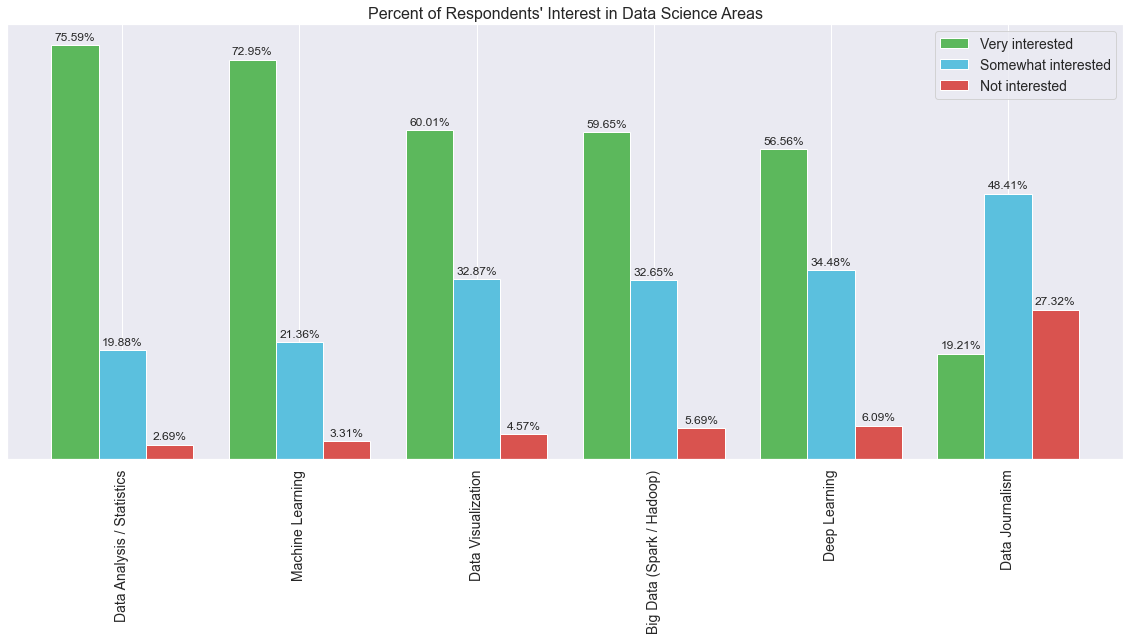

In [82]:
ax = percent_df1.plot(kind = 'bar',figsize = (20,8),width = 0.8, color = ('#5cb85c', '#5bc0de', '#d9534f'), fontsize = 14)
plt.title("Percent of Respondents' Interest in Data Science Areas", fontsize=16)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks([])
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


for i in ax.patches:

    y=i.get_height()

    x=i.get_x()+i.get_width()/2

    label = "{:.2%}".format(y/100)

    ax.annotate(label, xy=(x,y+1), ha='center')


plt.show()

In [98]:
sf_data = pd.read_csv (r'C:\Users\peter\OneDrive\Documents\IBM Data Science\Data Visualization with Python\Final Project\Police_Department_Incidents_-_Previous_Year__2016_\Police_Department_Incidents_-_Previous_Year__2016_.csv')

sf_data.head(3)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010


In [99]:
sf_data.rename(columns={'PdDistrict':'Neighborhood', 'Category':'Count'}, inplace=True)
sf_data.columns

Index(['IncidntNum', 'Count', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'Neighborhood', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

sf_data.shape

In [110]:
sf_neighborhood=pd.DataFrame(sf_data.groupby(["Neighborhood"]).size().reset_index(name='Count'))

In [112]:
sf_neighborhood.head(20)

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [115]:
!pip install folium

In [116]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [113]:
import urllib.request
urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson", "san-francisco.json")

('san-francisco.json', <http.client.HTTPMessage at 0x23b3b389a00>)

In [133]:
sf_geo = r'san-francisco.json' # geojson file

# create a plain world map
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

In [134]:
#world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(sf_neighborhood['Count'].min(),
                              sf_neighborhood['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
#world_map = folium.Map(location=[0, 0], zoom_start=2)
sf_map.choropleth(
    geo_data=sf_geo,
    data=sf_neighborhood,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crimes in San Francisco',
    reset=True
)
sf_map

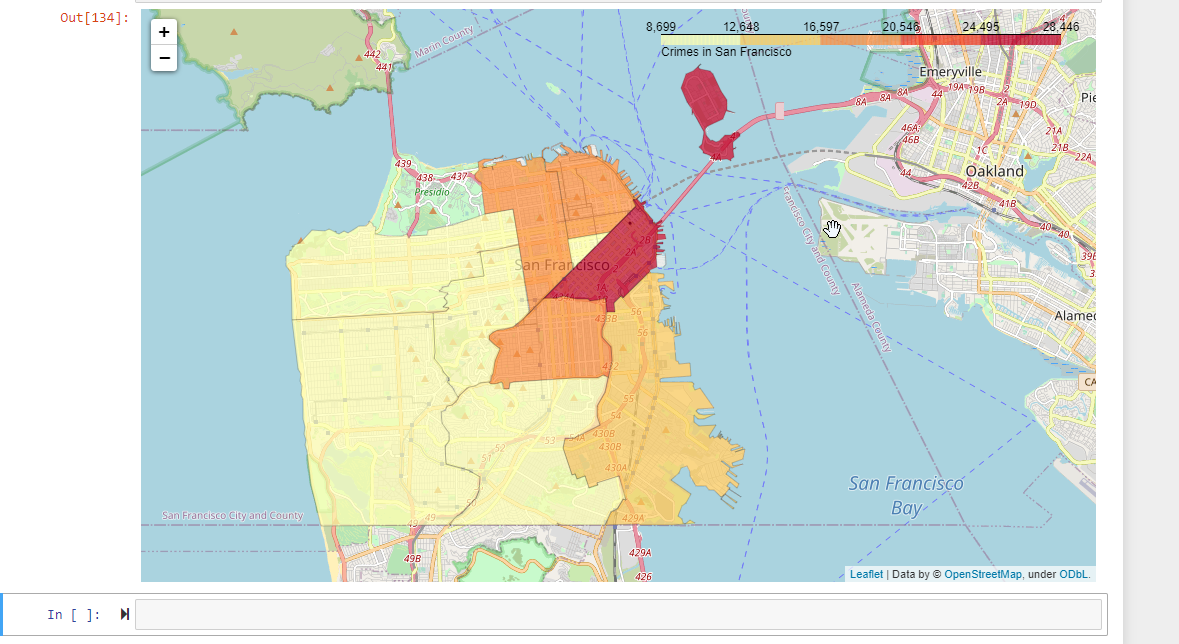